In [1]:
from pathlib import Path

import sys
sys.path.append('/path/to/cnn-interaction-interpretability/src')
from evaluation_functions import *
from visualization_functions import *

### Path and data inits

In [9]:
path = Path('/path/to/data')

datasets = ['SPI1', 'MEF2A', 'MAX', 'distinct_1' ,'distinct_2']
dataset = datasets[1]
motif_labels = {'MEF2A':['MA0052.1', 'MA0052.2', 'MA0052.3', 'MA0052.4']}
sizes = ['small']
methods = ['ig','fp','ds']

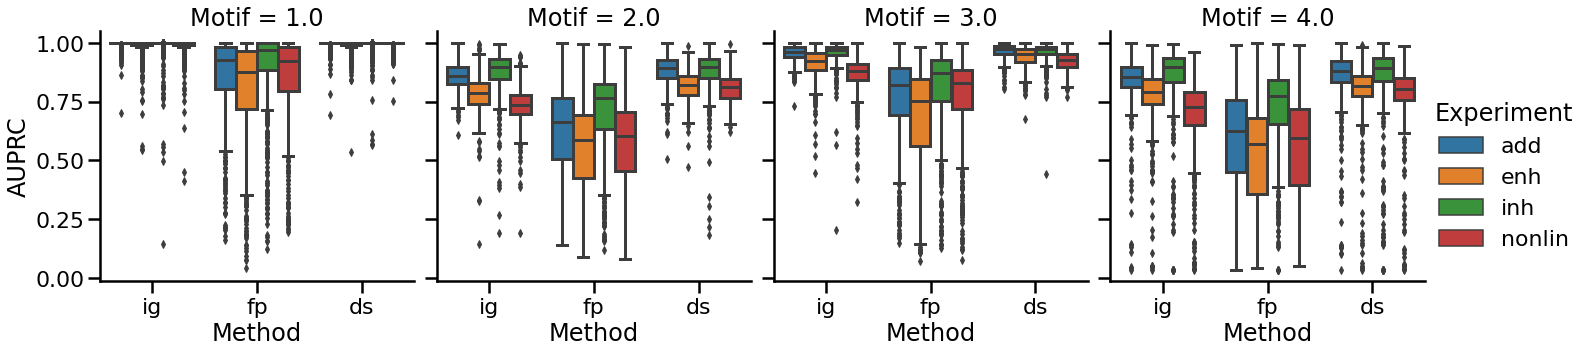

In [4]:
for dataset in datasets:
    for size in sizes:
        plot_df = boxplot_auprc_reg(path / 'Regression' / dataset, methods, size, [42,43,44,45,46], refseq='N', nr_motifs=4, absolute = True, target = 0)
        #plot_df.to_csv(path / dataset /'contributions'/'auprc'/str('auprc_'+size+'.csv'))
        #plot_df = pd.read_csv(path / dataset /'contributions'/'auprc'/str('auprc_'+size+'.csv'))
        #save_path = path / dataset / 'results' / 'auprc_single_motif' / str('auprc_'+size+'.svg')
        plot_all_positive_motifs(plot_df)

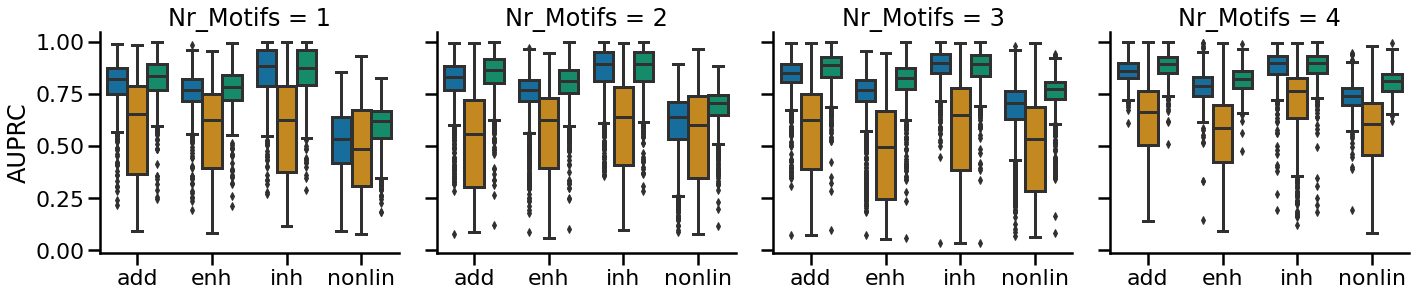

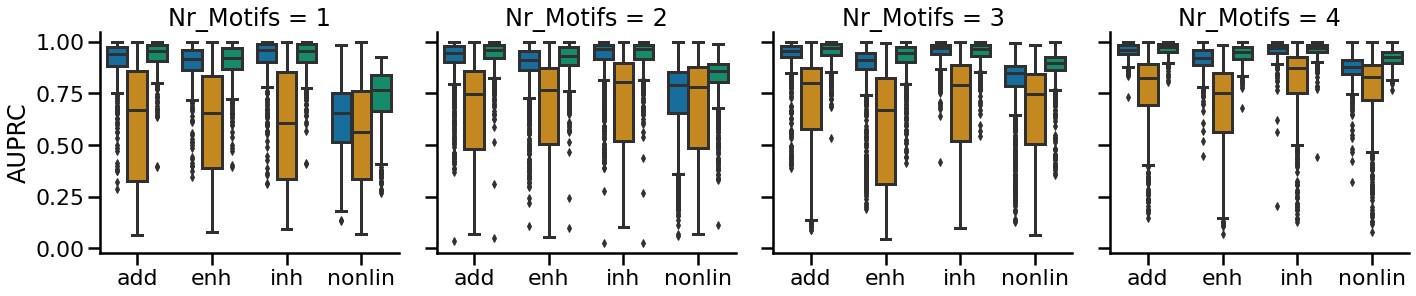

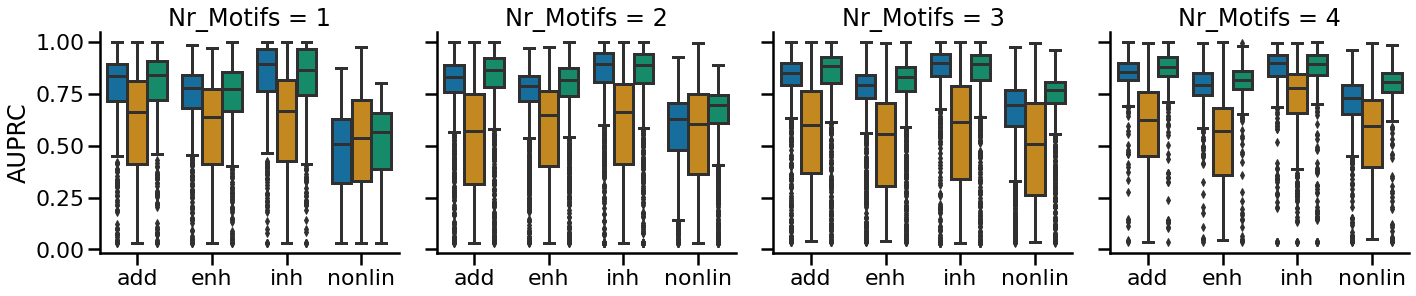

In [3]:
for dataset in datasets:
    for size in sizes:
        plot_df = boxplot_auprc_reg(path / dataset, methods, size, [42,43,44,45,46], refseq='N', nr_motifs=4, absolute = True, target = 0)
        plot_df.to_csv(path / dataset /'contributions'/'auprc'/str('auprc_'+size+'.csv'))
        for i in [1,2,3,4]:
            save_path = path / dataset / 'results' / 'auprc_single_motif' / str('auprc_motif_'+str(i)+'_'+size+'.svg')
            plot_single_motif(plot_df, i, save_path)

In [3]:
nr_motif_idx = {4:range(500), 3:range(500,2500), 2:range(2500, 5500), 1:range(5500,7500), 0:range(7500, 8000)}
labels = {'add':{0:0, 1:1, 2:2, 3:3, 4:4}, 
          'const':{0:0, 1:1, 2:2, 3:3, 4:6}, 
          'nonlin':{0:0, 1:0.25, 2:1, 3:2.25, 4:4}, 
          'inh':{0:0, 1:1, 2:2, 3:3}
}

In [42]:
reg_df = pred_df_regression(path, dataset, [42, 43, 44, 45, 46], 'small')
auc_df = boxplot_auprc_reg(path / 'Regression' / dataset, ['ig'], 'small', [42,43,44,45,46], refseq='N', nr_motifs=4, absolute = True, target = 0)
#auc_df = auprc_df(attr, pwm_model, nr_motif_idx, 4)
auc_df.head()

AUPRC  Motif Method Experiment  Nr_Motifs
0    NaN    1.0     ig        add          1
1    NaN    1.0     ig        add          1
2    NaN    1.0     ig        add          1
3    NaN    1.0     ig        add          1
4    NaN    1.0     ig        add          1

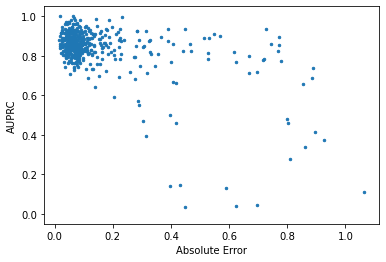

In [56]:
# Correlation between average absolute error and average AUPRC for one motif for integrated gradients
correlation_error_auprc(reg_df = reg_df, auprc_df = auc_df, seeds = [42,43,44,45,46], subset_reg_idx=nr_motif_idx, exp = 'add', motif_idx=4)